In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
# Define the dimensions of the surface
사이즈 = (10, 10)
사이즈[0]

10

In [10]:
def 정반세팅(사이즈):  #사이즈 = (10, 10)
    surface_width, surface_height = 사이즈[0], 사이즈[1]  # Adjusted to match the provided image for demonstration
    surface = np.zeros((surface_height, surface_width), dtype=int)
    return surface, surface_width, surface_height

In [11]:
surface, surface_width, surface_height = 정반세팅(사이즈)
surface, surface_width, surface_height

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 10,
 10)

In [6]:
# Define the blocks we want to place with a unique ID for each block type
block_sizes = [(2, 2), (3, 3), (2, 4), (4, 5), (2, 4), (2, 6), (2, 5), (4, 6), (2, 8), (4, 5)]  # Updated block list
block_names = ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8","S9", "S10"]

In [7]:
# Function to check if a block can be placed on the surface
def can_place(surface, block, start_row, start_col):
    block_height, block_width = block
    if start_row + block_height > surface_height or start_col + block_width > surface_width:
        return False
    return np.all(surface[start_row:start_row + block_height, start_col:start_col + block_width] == 0)

# Function to place a block on the surface, if possible
def place_block(surface, block, start_row, start_col, block_id):
    block_height, block_width = block
    surface[start_row:start_row + block_height, start_col:start_col + block_width] = block_id

# Function to find the best fit for a block on the surface
def find_best_fit(surface, block, block_id):
    best_fit_score = float('inf')
    best_position = None
    block_height, block_width = block

    # Iterate over all possible positions on the surface
    for y in range(surface_height - block_height + 1):
        for x in range(surface_width - block_width + 1):
            if can_place(surface, block, y, x):
                # Calculate a score; here we use the top-left corner (y, x) as the score
                # A lower score means the block is closer to the top-left
                score = y + x
                if score < best_fit_score:
                    best_fit_score = score
                    best_position = (y, x)

    # If a best position was found, place the block there
    if best_position:
        place_block(surface, block, *best_position, block_id)
        return True
    return False  # No fit found

# Function to fit blocks on the surface in order
def fit_blocks(surface, blocks, names):
    result_dict = dict()
    block_id = 1  # Start numbering blocks from 1
    for name, block in zip(names, blocks):
        if not find_best_fit(surface, block, block_id):
            print(f"Block {block_id} of size {block} could not be placed.")
            result_dict[name] = "미배치"
        else:
            result_dict[name] = "배치"
        block_id += 1  # Increment block_id for the next block
    return surface, result_dict

In [12]:
# Place the blocks on the surface
surface = fit_blocks(surface, block_sizes, block_names)
surface[0]

Block 8 of size (4, 6) could not be placed.
Block 9 of size (2, 8) could not be placed.
Block 10 of size (4, 5) could not be placed.


array([[1, 1, 2, 2, 2, 4, 4, 4, 4, 4],
       [1, 1, 2, 2, 2, 4, 4, 4, 4, 4],
       [0, 0, 2, 2, 2, 4, 4, 4, 4, 4],
       [3, 3, 3, 3, 0, 4, 4, 4, 4, 4],
       [3, 3, 3, 3, 7, 7, 7, 7, 7, 0],
       [5, 5, 5, 5, 7, 7, 7, 7, 7, 0],
       [5, 5, 5, 5, 0, 0, 0, 0, 0, 0],
       [6, 6, 6, 6, 6, 6, 0, 0, 0, 0],
       [6, 6, 6, 6, 6, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [13]:
surface[1]

{'S1': '배치',
 'S2': '배치',
 'S3': '배치',
 'S4': '배치',
 'S5': '배치',
 'S6': '배치',
 'S7': '배치',
 'S8': '미배치',
 'S9': '미배치',
 'S10': '미배치'}

In [14]:
# Visualize the surface with the blocks placed
def draw(surface):
    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size to be square
    # Create a colormap with a distinct color for each block ID
    cmap = mcolors.ListedColormap(['white'] + ['C{}'.format(i) for i in range(len(blocks))])
    norm = mcolors.BoundaryNorm(np.arange(0.5, len(blocks) + 2), cmap.N)

    ax.imshow(surface[0], cmap=cmap, norm=norm)

    # Add gridlines and block numbers
    for y in range(surface_height):
        for x in range(surface_width):
            if surface[0][y, x] != 0:
                ax.text(x, y, str(block_names[surface[0][y, x]-1]), ha='center', va='center', color='black')

    # Draw gridlines
    ax.set_xticks(np.arange(-.5, surface_width, 1), minor=True)
    ax.set_yticks(np.arange(-.5, surface_height, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)

    # Remove the major ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

NameError: name 'blocks' is not defined

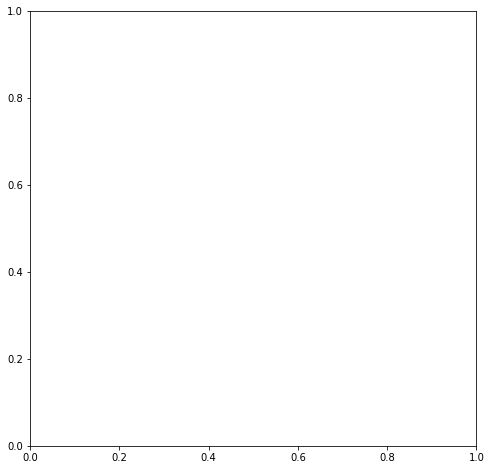

In [15]:
draw(surface)